In [ ]:
!pip install tensorflow==2.11.0
!pip install transformers==4.38.0
!pip install datasets
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install streamlit
!pip install wordcloud


ERROR: Could not find a version that satisfies the requirement tensorflow==2.11.0 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0)
ERROR: No matching distribution found for tensorflow==2.11.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.1/131.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 112.0 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.1
    Uninstalling tokenizers-0.21.1:
      Successfully uninstalled tokenizers-0.21.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.51.3
    Uninstalling transformers-4.51

# 📊 Sentiment Analysis on Product Reviews Amazon

## 📌 Problem Statement

In today’s digital landscape, businesses receive a constant influx of customer feedback through product reviews, social media comments, and surveys. Manually analyzing this large volume of data is time-consuming, inconsistent, and inefficient.

**Sentiment Analysis** leverages Natural Language Processing (NLP) techniques to automatically detect the emotional tone behind text data. This enables businesses to understand customer opinions, monitor brand reputation, and make data-driven decisions faster.

---

## 📌 Objective

The primary objective of this project is to build an AI-powered Sentiment Analysis model that can classify product reviews into three categories:

- **Positive**
- **Negative**
- **Neutral**

The solution will utilize **HuggingFace’s BERT model for embeddings** and a **TensorFlow/Keras-based classifier** to accurately predict sentiments.

---

## 📌 Business Use Case

- Automate the analysis of customer feedback.
- Identify product strengths and weaknesses through sentiment trends.
- Enable proactive response to negative reviews.
- Support marketing and product improvement strategies with data-driven insights.

---

## 📌 Scope of the Project

- Perform Exploratory Data Analysis (EDA) on product review datasets.
- Preprocess text data: cleaning, tokenization, and embedding generation.
- Train and evaluate a sentiment classification model using TensorFlow/Keras.
- Build an interactive web application for real-time sentiment prediction (Streamlit).
- Deploy the application and document the entire workflow on GitHub.

---

## 📌 Expected Outcome

- A robust Sentiment Analysis model capable of predicting review sentiments.
- A deployed Streamlit app for live sentiment classification.
- A fully documented, portfolio-ready project repository demonstrating an end-to-end ML/NLP pipeline.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv('//content//Reviews.csv')
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df.shape

(568454, 10)

In [ ]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

### Column Meaning

Id	=Unique identifier for each review.

ProductId	=ID of the product being reviewed.

UserId	=ID of the user who wrote the review.

ProfileName =	Name of the reviewer.

HelpfulnessNumerator =Number of people who found this review helpful.

HelpfulnessDenominator	= Total number of people who voted on helpfulness.

Score =	Rating given by user (usually 1 to 5).

Time =	Timestamp of when the review was posted.

Summary	=Short headline of the review.

Text =	Full text of the review.

### Handling Missing values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [ ]:
df.isnull().sum()

,0
Id,0
ProductId,0
UserId,0
ProfileName,26
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,27
Text,0


### dropping null values as they are less in number

In [ ]:
df.isnull().dropna()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
568449,False,False,False,False,False,False,False,False,False,False
568450,False,False,False,False,False,False,False,False,False,False
568451,False,False,False,False,False,False,False,False,False,False
568452,False,False,False,False,False,False,False,False,False,False


### Text Length Analysis

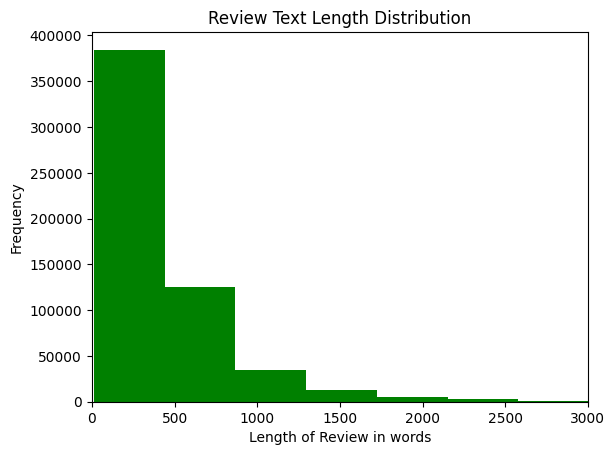

In [ ]:
# Add new column for text length
df['Review_Length'] = df['Text'].astype(str).apply(len)

# Plot histogram
plt.hist(df['Review_Length'], bins=50,color="green")
plt.title('Review Text Length Distribution')
plt.xlabel('Length of Review in words')
plt.xlim(0,3000)
plt.ylabel('Frequency')
plt.show()


###  Word Frequency ,the most common words in this dataset.

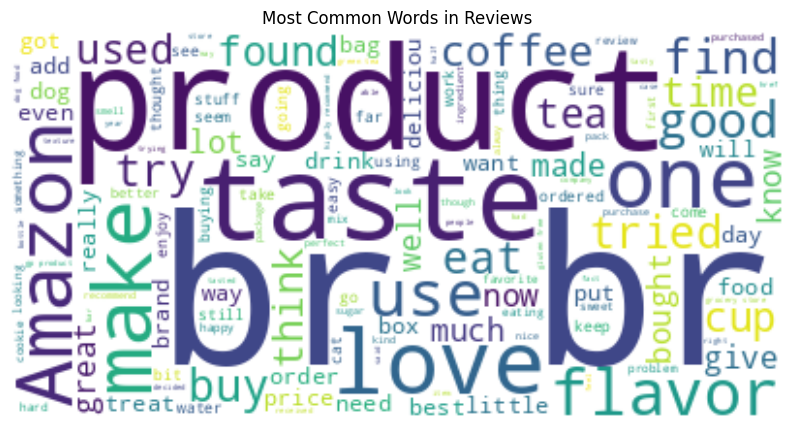

In [ ]:
from wordcloud import WordCloud, STOPWORDS

text_data = ' '.join(df['Text'].astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white').generate(text_data)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Reviews')
plt.show()


### EDA Summary for Sentiment Analysis Project

- The dataset contains predominantly short reviews, with the majority under 500 words.
- Minimal missing values were present and have been safely removed.
- WordCloud analysis revealed frequent use of product-related and emotion-driven words such as "love", "good", "taste", and "product".
- Class distribution check pending, but initial EDA supports proceeding with standard BERT embeddings and a Dense classifier head.
- No advanced preprocessing like LSTM or domain-specific vocabulary needed at this stage.


### Create Sentiment Labels



In [ ]:
def map_score_to_sentiment(score):
    if score in [1, 2]:
        return 'Negative'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Positive'

df['Sentiment'] = df['Score'].apply(map_score_to_sentiment)

### Text Preprocessing (Clean Text Column)

In [ ]:
import re  # Import the regular expressions module

def clean_text(text):
    text = str(text).lower()  # Convert input to string (if not already) and make it lowercase for uniformity

    # Remove URLs starting with http, https, or www followed by non-space characters
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Remove HTML tags like <br>, <p>, etc.
    text = re.sub(r'<.*?>', '', text)

    # Remove all punctuation/special characters except letters, numbers, and spaces
    # [^\w\s] means: everything except (word characters a-z, A-Z, 0-9, _ and whitespace)
    text = re.sub(r'[^\w\s]', '', text)

    # Remove all digits (0-9) from the text
    text = re.sub(r'\d+', '', text)

    # Replace multiple spaces/tabs/newlines with a single space, and strip leading/trailing spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text  # Return the cleaned text

# Apply the clean_text function to each row in the 'Text' column and create a new 'Cleaned_Text' column
df['Cleaned_Text'] = df['Text'].apply(clean_text)


### Tokenization using BERT Tokenizer

After cleaning, my text is readable.

But BERT doesn’t understand words → it understands token IDs & attention masks.

So now we’ll convert text to BERT's language → tokenization.

In [ ]:
from transformers import BertTokenizer

#Load Pre-trained BERT tokenizer , I want my inputs to be case insensitive so i'm using uncased here.

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokenized_inputs= tokenizer(
    list(df['Cleaned_Text']),
         max_length = 128,
         padding = 'max_length',
         truncation = True,
         return_tensors= 'tf'
)

#check shapes
print(tokenized_inputs['input_ids'].shape)
print(tokenized_inputs['attention_mask'].shape)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

(568454, 128)
(568454, 128)


We’re going to pass the tokenized data to the BERT model.

BERT will give us embeddings → numerical representations of sentences.

Specifically, we’ll extract the [CLS] token embedding.

### Get CLS Token Embeddings

In [ ]:
from transformers import TFBertModel
import tensorflow as tf
import numpy as np
from tqdm import tqdm

batch_size = 32  # You can adjust this (16, 32, 64 based on your RAM)

bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Create placeholders for CLS embeddings
cls_embeddings_list = []

# Loop over batches
for i in tqdm(range(0, tokenized_inputs['input_ids'].shape[0], batch_size)):
    batch_input_ids = tokenized_inputs['input_ids'][i:i+batch_size]
    batch_attention_mask = tokenized_inputs['attention_mask'][i:i+batch_size]

    # Pass batch through BERT model
    outputs = bert_model({'input_ids': batch_input_ids, 'attention_mask': batch_attention_mask})

    # Extract CLS embedding for batch
    cls_batch = outputs.pooler_output.numpy()

    cls_embeddings_list.append(cls_batch)

# Concatenate all batches back into one big array
cls_embeddings = np.concatenate(cls_embeddings_list, axis=0)

# Check shape
print("Final CLS Embeddings Shape:", cls_embeddings.shape)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Final CLS Embeddings Shape: (568454, 768)


### Build Classifier & Train Model

In [ ]:
import tensorflow as tf

# Labels (ensure you have this ready)
label_map = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
y_labels = df['Sentiment'].map(label_map).values  # Shape: (106337,)

# Build simple dense classifier
input_layer = tf.keras.Input(shape=(768,))
output_layer = tf.keras.layers.Dense(3, activation='softmax')(input_layer)

model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(cls_embeddings, y_labels, epochs=3, batch_size=32)


Epoch 1/3
17765/17765 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.8039 - loss: 0.5270
Epoch 2/3
17765/17765 ━━━━━━━━━━━━━━━━━━━━ 80s 2ms/step - accuracy: 0.8253 - loss: 0.4652
Epoch 3/3
17765/17765 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.8281 - loss: 0.4567


This code defines a simple neural network that takes in a 768-dimensional input vector, passes it through a dense layer with 3 output neurons (representing 3 classes), and applies the softmax activation function to produce a probability distribution over the classes. The model is then compiled with the Adam optimizer, the sparse categorical cross-entropy loss function, and the accuracy metric. Finally, the model is trained on the provided data (cls_embeddings and y_labels) for 3 epochs, using a batch size of 32. The model learns to map the input vectors to the correct class labels. The trained model can then be used to predict the class of new, unseen input vectors.

In [ ]:
# Evaluate on same data (ideally, use separate test set)
loss, accuracy = model.evaluate(cls_embeddings, y_labels)
print(f"Final Evaluation Accuracy: {accuracy:.2f}")
print(f"Final Evaluation Loss: {loss:.2f}")


17765/17765 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.8313 - loss: 0.4500
Final Evaluation Accuracy: 0.83
Final Evaluation Loss: 0.44


In [ ]:
def predict_sentiment(review_text):
    # Clean the review
    cleaned_text = clean_text(review_text)

    # Tokenize
    inputs = tokenizer(
        cleaned_text,
        max_length=128,
        padding='max_length',
        truncation=True,
        return_tensors='tf'
    )

    # Get CLS embeddings
    outputs = bert_model(inputs)
    cls_embedding = outputs.pooler_output

    # Predict
    prediction = model.predict(cls_embedding)
    predicted_class = tf.argmax(prediction, axis=1).numpy()[0]

    # Map back to label
    label_map_reverse = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
    return label_map_reverse[predicted_class]

# Example usage
print(predict_sentiment("I absolutely love this product!"))
print(predict_sentiment("It's okay, not bad, not great."))
print(predict_sentiment("Worst purchase ever, I regret it."))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Negative


In [ ]:
from sklearn.model_selection import train_test_split

# Split your embeddings & labels (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(cls_embeddings, y_labels, test_size=0.2, random_state=42)

# Rebuild & train model only on train set
model = tf.keras.Sequential([
    tf.keras.Input(shape=(768,)),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=3, batch_size=32)

# Evaluate on test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


Epoch 1/3
14212/14212 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - accuracy: 0.8020 - loss: 0.5316
Epoch 2/3
14212/14212 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.8228 - loss: 0.4698
Epoch 3/3
14212/14212 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - accuracy: 0.8266 - loss: 0.4602
3553/3553 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8313 - loss: 0.4464
Test Accuracy: 0.83


In [ ]:
model.save('bert_sentiment_classifier.h5')


In [ ]:
loaded_model = tf.keras.models.load_model('bert_sentiment_classifier.h5')


In [ ]:
import streamlit as st
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf

# Load your saved model (assuming you saved it already)
model = tf.keras.models.load_model('bert_sentiment_classifier.h5')

# Load BERT tokenizer and model (for CLS embeddings)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Clean text function (reuse from your project)
import re
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Define prediction function
def predict_sentiment(review_text):
    cleaned_text = clean_text(review_text)
    inputs = tokenizer(cleaned_text, max_length=128, padding='max_length', truncation=True, return_tensors='tf')
    outputs = bert_model(inputs)
    cls_embedding = outputs.pooler_output
    prediction = model.predict(cls_embedding)
    predicted_class = tf.argmax(prediction, axis=1).numpy()[0]
    label_map_reverse = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
    return label_map_reverse[predicted_class]

# Build the app UI
st.title("Amazon Review Sentiment Analyzer")

user_input = st.text_area("Enter a product review:")
if st.button("Predict Sentiment"):
    result = predict_sentiment(user_input)
    st.write(f"### Predicted Sentiment: {result}")


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w